# OverView - Deap

This tutorial will present a quick overview of what DEAP is all about along with what every DEAP program is made of.

## Types

The first thing to do is to think of the appropriate type for your problem. Then, instead of looking in the list of available types, DEAP enables you to build your own. This is done with the creator module. Creating an appropriate type might seem overwhelming but the creator makes it very easy.

In [6]:
from deap import base, creator, algorithms, benchmarks
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

That’s it. More on creating types can be found in the [Creation Types](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html) tutorial.


## Initialization

Once the types are created you need to fill them with sometimes random values or sometime guessed ones. Again, DEAP provides an easy mechanism to do just that. The Toolbox is a container for tools of all sorts including initializers that can do what is needed of them. The following takes on the last lines of code to create the initializers for individuals containing random floating point numbers and for a population that contains them.

In [135]:
import random
#import numpy as np
#import math
from deap import tools

IND_SIZE = 10

toolbox = base.Toolbox()
toolbox.register("attribute", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attribute, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Funtion

Rastrigin Funcion


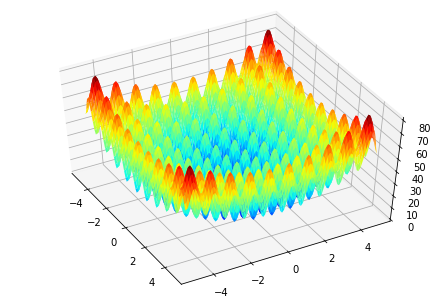

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from deap import benchmarks

def rastrigin_arg0(sol):
    return benchmarks.rastrigin(sol)[0]

fig = plt.figure()
ax = Axes3D(fig, azim = -29, elev = 50)
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = rastrigin_arg0((X[i,j],Y[i,j]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
plt.show()

This creates functions to initialize populations from individuals that are themselves initialized with random float numbers. The functions are registered in the toolbox with their default arguments under the given name. For example, it will be possible to call the function toolbox.population() to instantly create a population. More initialization methods are found in the Creating Types tutorial and the various Examples.

## Operators

Operators are just like initializers, except that some are already implemented in the tools module. Once you’ve chosen the perfect ones, simply register them in the toolbox. In addition you must create your evaluation function. This is how it is done in DEAP.

In [9]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", benchmarks.rastrigin)

The registered functions are renamed by the toolbox, allowing generic algorithms that do not depend on operator names. Note also that fitness values must be iterable, that is why we return a tuple in the evaluate function. More on this in the Operators and Algorithms tutorial and Examples.

## Algorithms

Now that everything is ready, we can start to write our own algorithm. It is usually done in a main function. For the purpose of completeness we will develop the complete generational algorithm.

It is also possible to use one of the four algorithms readily available in the algorithms module, or build from some building blocks called variations also available in this module.

In [10]:
import random
from deap import base, creator, tools, algorithms, benchmarks

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", benchmarks.rastrigin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

ind = toolbox.individual()
toolbox.mutate(ind)

def main():
    import numpy

    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

gen	nevals	avg    	min    	max    
0  	50    	105.115	57.6209	150.606
1  	33    	83.6977	45.201 	122.117
2  	29    	68.4662	40.6637	101.019
3  	35    	52.5562	20.629 	84.2635
4  	33    	39.1994	9.35189	60.3896
5  	30    	28.3451	6.70054	49.1448
6  	37    	17.9932	4.36369	36.814 
7  	31    	11.0664	3.6671 	36.0597
8  	30    	6.79087	1.33025	13.9519
9  	29    	5.21265	1.33025	8.76601
10 	24    	4.05488	1.33025	8.11466
11 	28    	3.06398	0.776392	6.70054
12 	29    	2.14404	0.776392	4.25298
13 	39    	1.39916	0.776306	3.33025
14 	27    	1.18885	0.776306	3.33016
15 	36    	0.936229	0.728282	2.77639
16 	32    	0.993466	0.174342	3.77631
17 	35    	1.06625 	0.174342	3.77639
18 	33    	0.783918	0.174342	2.77631
19 	36    	0.503695	0.174342	1.77631
20 	34    	0.447178	0       	3.17434
21 	31    	0.270855	0       	3.17434
22 	27    	0.410855	0       	3.17434
23 	32    	0.267368	0       	2.17434
24 	35    	0.300394	0       	2.17434
25 	35    	0.28296 	0       	2.17434
26 	32    	0.284605	0       	

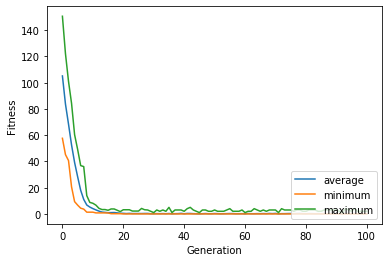

In [11]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()